In [1]:
import bnlearn as bn
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Load example mixed dataset
df = bn.import_example(data='titanic')

[bnlearn] >Import dataset..


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random

In [2]:
dfhot, dfnum = bn.df2onehot(df)


[df2onehot] >Auto detecting dtypes.


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 228.96it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 355.33it/s]

[df2onehot] >Total onehot features: 19


In [37]:
dfnum

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,108,1,2,1,523,146,3
1,1,1,190,0,2,1,596,81,1
2,1,3,353,0,1,1,669,146,3
3,1,1,272,0,2,1,49,55,3
4,0,3,15,1,1,1,472,146,3
...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,1,1,101,146,3
887,1,1,303,0,1,1,14,30,3
888,0,3,413,0,2,3,675,146,3
889,1,1,81,1,1,1,8,60,1


In [44]:
# This is the dimension of the original space
input_dim = 9

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

In [45]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='Adam')

In [46]:
model_history = autoencoder.fit(dfnum,
                                dfnum, 
                                epochs=256, batch_size=32, verbose=1)


Epoch 1/256
28/28 [==============================] - 0s 3ms/step - loss: 23494.1953
Epoch 2/256
28/28 [==============================] - 0s 3ms/step - loss: 6348.7378
Epoch 3/256
28/28 [==============================] - 0s 3ms/step - loss: 5649.6533
Epoch 4/256
28/28 [==============================] - 0s 3ms/step - loss: 5602.4692
Epoch 5/256
28/28 [==============================] - 0s 3ms/step - loss: 5614.3862
Epoch 6/256
28/28 [==============================] - 0s 3ms/step - loss: 5630.4150
Epoch 7/256
28/28 [==============================] - 0s 3ms/step - loss: 5671.2075
Epoch 8/256
28/28 [==============================] - 0s 3ms/step - loss: 5675.7974
Epoch 9/256
28/28 [==============================] - 0s 3ms/step - loss: 5628.3481
Epoch 10/256
28/28 [==============================] - 0s 3ms/step - loss: 5675.4946
Epoch 11/256
28/28 [==============================] - 0s 3ms/step - loss: 5635.2183
Epoch 12/256
28/28 [==============================] - 0s 3ms/step - loss: 5630.8550


28/28 [==============================] - 0s 3ms/step - loss: 4860.2769
Epoch 99/256
28/28 [==============================] - 0s 3ms/step - loss: 4782.8574
Epoch 100/256
28/28 [==============================] - 0s 3ms/step - loss: 4716.8350
Epoch 101/256
28/28 [==============================] - 0s 3ms/step - loss: 4600.8618
Epoch 102/256
28/28 [==============================] - 0s 3ms/step - loss: 4380.1436
Epoch 103/256
28/28 [==============================] - 0s 2ms/step - loss: 4571.6914
Epoch 104/256
28/28 [==============================] - 0s 3ms/step - loss: 4473.5288
Epoch 105/256
28/28 [==============================] - 0s 3ms/step - loss: 4315.7891
Epoch 106/256
28/28 [==============================] - 0s 3ms/step - loss: 4284.6743
Epoch 107/256
28/28 [==============================] - 0s 3ms/step - loss: 4364.5859
Epoch 108/256
28/28 [==============================] - 0s 2ms/step - loss: 4183.3955
Epoch 109/256
28/28 [==============================] - 0s 3ms/step - loss: 4180.

28/28 [==============================] - 0s 4ms/step - loss: 80.5079
Epoch 197/256
28/28 [==============================] - 0s 5ms/step - loss: 76.0958
Epoch 198/256
28/28 [==============================] - 0s 5ms/step - loss: 74.4932
Epoch 199/256
28/28 [==============================] - 0s 5ms/step - loss: 75.4177
Epoch 200/256
28/28 [==============================] - 0s 5ms/step - loss: 78.6217
Epoch 201/256
28/28 [==============================] - 0s 3ms/step - loss: 78.7118
Epoch 202/256
28/28 [==============================] - 0s 2ms/step - loss: 75.7436
Epoch 203/256
28/28 [==============================] - 0s 3ms/step - loss: 80.0299
Epoch 204/256
28/28 [==============================] - 0s 2ms/step - loss: 85.1901
Epoch 205/256
28/28 [==============================] - 0s 3ms/step - loss: 74.2235
Epoch 206/256
28/28 [==============================] - 0s 3ms/step - loss: 72.6097
Epoch 207/256
28/28 [==============================] - 0s 3ms/step - loss: 78.2143
Epoch 208/256
28/2

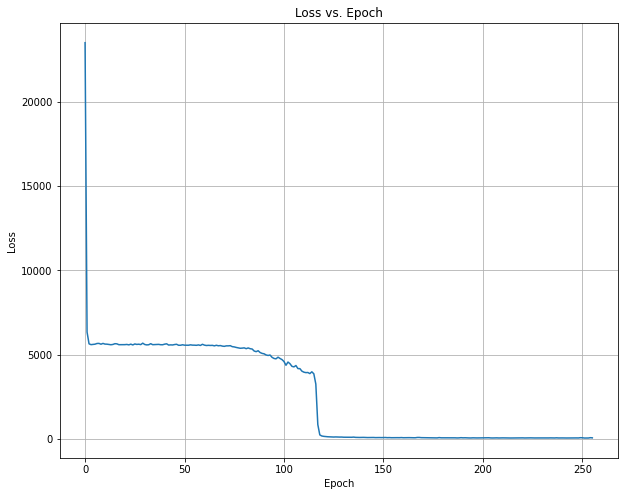

In [47]:
fig = plt.figure(figsize=(10,8))
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

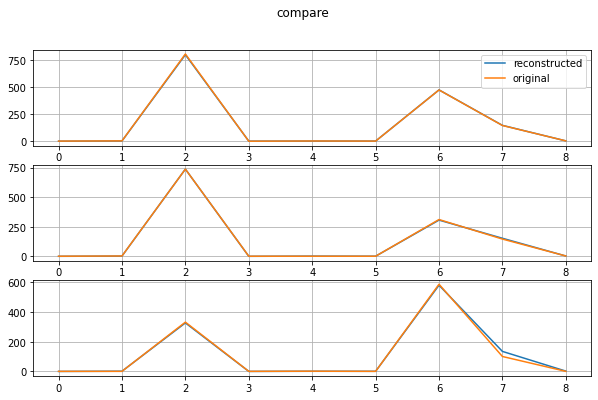

In [48]:
fig = plt.figure(figsize=(10,6))
plt.suptitle('compare')
for i in range(3):
    plt.subplot(3, 1, i+1)
    idx = random.sample(range(dfnum.shape[0]), 1)
    plt.plot(autoencoder.predict(dfnum.values[idx]).squeeze(), label='reconstructed' if i == 0 else '')
    plt.plot(dfnum.values[idx].squeeze(), label='original' if i == 0 else '')
    #fig.axes[i].set_xticklabels(metric_names)
    plt.xticks(np.arange(0, 9, 1))
    plt.grid(True)
    if i == 0: plt.legend();

In [49]:
encoder_result = encoder(dfnum.values)

In [50]:
encoder_result

<tf.Tensor: shape=(891, 2), dtype=float32, numpy=
array([[53.302567, 61.599182],
       [68.31838 , 69.74757 ],
       [90.795044, 75.03679 ],
       ...,
       [97.23066 , 74.72744 ],
       [11.210402,  6.338429],
       [60.225536, 52.341335]], dtype=float32)>

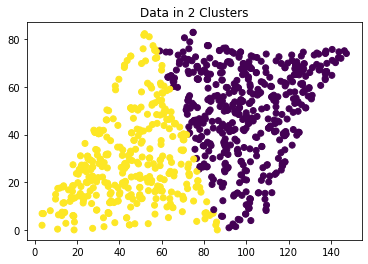

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plotlib
number_of_clusters = 2
y_pred = KMeans(n_clusters=number_of_clusters).fit_predict(encoder_result)

# Plot the clustered data points.
plotlib.scatter(encoder_result[:, 0], encoder_result[:, 1], c=y_pred)
plotlib.title("Data in " + str(number_of_clusters) + " Clusters")

# Display the plot.
plotlib.show()

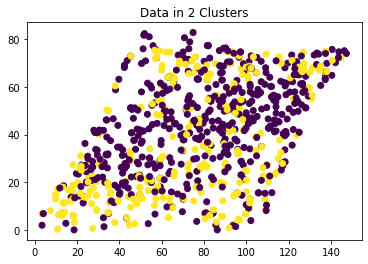

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plotlib
number_of_clusters = 2
y_pred = KMeans(n_clusters=number_of_clusters).fit_predict(encoder_result)

# Plot the clustered data points.
plotlib.scatter(encoder_result[:, 0], encoder_result[:, 1], c=dfnum['Survived'])
plotlib.title("Data in " + str(number_of_clusters) + " Clusters")

# Display the plot.
plotlib.show()